In [5]:
import pyreadr

df1 = pyreadr.read_r('ml_pay.rdata')

print(df1.keys())
df = df1['ml_pay']
print(df.head())

odict_keys(['ml_pay'])
    payroll    avgwin        Team.name.2014      p1998      p1999      p2000  \
0  1.120874  0.490259  Arizona Diamondbacks  31.614500  70.496000  81.027833   
1  1.381712  0.552761        Atlanta Braves  61.708000  74.890000  84.537836   
2  1.161212  0.453825     Baltimore Orioles  71.860921  72.198363  81.447435   
3  1.972359  0.548717        Boston Red Sox  59.497000  71.725000  77.940333   
4  1.459767  0.473656          Chicago Cubs  49.816000  42.142761  60.539333   

        p2001       p2002       p2003       p2004  ...  X2007.pct  X2006.pct  \
0   81.206513  102.820000   80.640333   70.204984  ...   0.552147   0.469136   
1   91.851687   93.470367  106.243667   88.507788  ...   0.515337   0.487654   
2   72.426328   60.493487   73.877500   51.212653  ...   0.423313   0.432099   
3  109.558908  108.366060   99.946500  125.208542  ...   0.588957   0.530864   
4   64.015833   75.690833   79.868333   91.101667  ...   0.521472   0.407407   

   X2005.pct  X

In [6]:
print(f'df rows: {len(df)}')
print(f'df columns: {len(df.columns)}')

df rows: 30
df columns: 54


In [8]:
import pandas as pd

# Import necessary libraries

# Create mlb_aggregate dataframe
mlb_aggregate = df[['Team.name.2014', 'payroll', 'avgwin']].copy()
mlb_aggregate.columns = ['team', 'payroll_aggregate', 'pct_wins_aggregate']

# Create mlb_yearly dataframe
# Melt the dataframe to get year, payroll, and pct_wins in long format
mlb_yearly = pd.melt(df, id_vars=['Team.name.2014'], 
                     value_vars=[col for col in df.columns if col.startswith('p') and col[1:].isdigit()],
                     var_name='year', value_name='payroll_yearly')
mlb_yearly['year'] = mlb_yearly['year'].str[1:].astype(int)

# Melt the dataframe again to get pct_wins
mlb_yearly_pct = pd.melt(df, id_vars=['Team.name.2014'], 
                         value_vars=[col for col in df.columns if col.startswith('X') and col[1:].isdigit()],
                         var_name='year', value_name='num_wins')
mlb_yearly_pct['year'] = mlb_yearly_pct['year'].str[1:].astype(int)

# Merge the two melted dataframes on team and year
mlb_yearly = pd.merge(mlb_yearly, mlb_yearly_pct, on=['Team.name.2014', 'year'])

# Melt the dataframe again to get pct_wins
mlb_yearly_pct = pd.melt(df, id_vars=['Team.name.2014'], 
                         value_vars=[col for col in df.columns if col.endswith('.pct')],
                         var_name='year', value_name='pct_wins')
mlb_yearly_pct['year'] = mlb_yearly_pct['year'].str[1:5].astype(int)

# Merge the two melted dataframes on team and year
mlb_yearly = pd.merge(mlb_yearly, mlb_yearly_pct, on=['Team.name.2014', 'year'])

# Rename columns
mlb_yearly.columns = ['team', 'year', 'payroll_yearly', 'num_wins', 'pct_wins']

# Display the resulting dataframes
print(mlb_aggregate.head())
print(mlb_yearly.head())

                   team  payroll_aggregate  pct_wins_aggregate
0  Arizona Diamondbacks           1.120874            0.490259
1        Atlanta Braves           1.381712            0.552761
2     Baltimore Orioles           1.161212            0.453825
3        Boston Red Sox           1.972359            0.548717
4          Chicago Cubs           1.459767            0.473656
                   team  year  payroll_yearly  num_wins  pct_wins
0  Arizona Diamondbacks  1998       31.614500        65  0.398773
1        Atlanta Braves  1998       61.708000       106  0.650307
2     Baltimore Orioles  1998       71.860921        79  0.484663
3        Boston Red Sox  1998       59.497000        92  0.564417
4          Chicago Cubs  1998       49.816000        90  0.552147


In [9]:
mlb_aggregate_computed = mlb_yearly.groupby('team').agg(
    payroll_aggregate_computed=('payroll_yearly', 'mean'),
    pct_wins_aggregate_computed=('pct_wins', 'mean')
).reset_index()

print(mlb_aggregate_computed.head())

                   team  payroll_aggregate_computed  \
0  Arizona Diamondbacks                   71.940244   
1        Atlanta Braves                   89.312342   
2     Baltimore Orioles                   76.780648   
3        Boston Red Sox                  123.740041   
4          Chicago Cubs                   91.277976   

   pct_wins_aggregate_computed  
0                     0.492126  
1                     0.563154  
2                     0.457092  
3                     0.551286  
4                     0.474590  


C:\Users\User\AppData\Local\Temp\ipykernel_24912\118609656.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mlb_aggregate_computed = mlb_yearly.groupby('team').agg(


Text(0, 0.5, 'Aggregate Payroll')

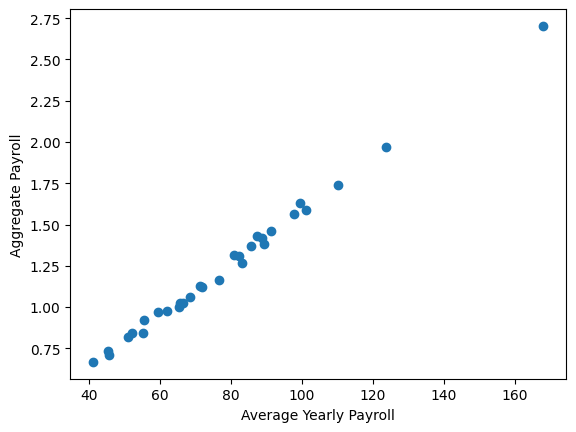

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#create an scatterplot
plt.scatter(mlb_aggregate_computed['payroll_aggregate_computed'], mlb_aggregate['payroll_aggregate'])
plt.xlabel('Average Yearly Payroll')
plt.ylabel('Aggregate Payroll')

Text(0, 0.5, 'Aggregate Win Percentage')

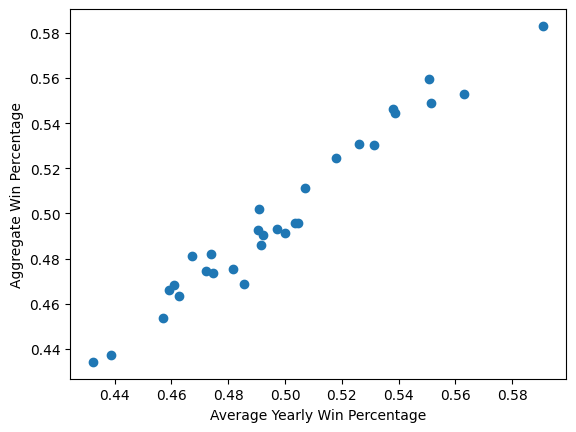

In [14]:
plt.scatter(mlb_aggregate_computed['pct_wins_aggregate_computed'], mlb_aggregate['pct_wins_aggregate'])
plt.xlabel('Average Yearly Win Percentage')
plt.ylabel('Aggregate Win Percentage')

In [17]:
mlb_ranked = mlb_aggregate_computed[['team', 'payroll_aggregate_computed']].copy()
mlb_ranked['rank'] = mlb_ranked['payroll_aggregate_computed'].rank(ascending=False)
mlb_ranked = mlb_ranked.sort_values('payroll_aggregate_computed', ascending=False)
print(mlb_ranked)

top_3_teams = mlb_ranked.head(3)
print(top_3_teams)

                     team  payroll_aggregate_computed  rank
18       New York Yankees                  168.064271   1.0
3          Boston Red Sox                  123.740041   2.0
13    Los Angeles Dodgers                  110.246725   3.0
17          New York Mets                  101.093876   4.0
20  Philadelphia Phillies                   99.371266   5.0
12     Los Angeles Angels                   97.698801   6.0
4            Chicago Cubs                   91.277976   7.0
1          Atlanta Braves                   89.312342   8.0
23   San Francisco Giants                   88.903015   9.0
9          Detroit Tigers                   87.290471  10.0
25    St. Louis Cardinals                   85.786809  11.0
27          Texas Rangers                   83.024488  12.0
24       Seattle Mariners                   82.306749  13.0
5       Chicago White Sox                   80.888584  14.0
2       Baltimore Orioles                   76.780648  15.0
0    Arizona Diamondbacks               

In [ ]:
# Calculate the percentage increase in payroll from 1998 to 2014
df['pct_increase'] = ((df['p2014'] - df['p1998']) / df['p1998']) * 100

payroll_increase = df[['Team.name.2014', 'p1998', 'p2014', 'pct_increase']]

payroll_increase_sorted = payroll_increase.sort_values(by='pct_increase', ascending=False)

top_3_increase = payroll_increase_sorted.head(3)

# Print the table of the top 3 teams
print(top_3_increase)

           Team.name.2014    p1998       p2014  pct_increase
29   Washington Nationals   8.3170  134.704437   1519.627714
9          Detroit Tigers  19.2375  162.228527    743.293188
20  Philadelphia Phillies  28.6225  180.052723    529.060086


In [19]:
# Sort the dataframe by pct_wins_aggregate_computed in descending order
top_3_pct_wins = mlb_aggregate_computed.nlargest(3, 'pct_wins_aggregate_computed')

# Select the relevant columns
top_3_pct_wins = top_3_pct_wins[['team', 'pct_wins_aggregate_computed']]

# Print the table of the top 3 teams
print(top_3_pct_wins)

                team  pct_wins_aggregate_computed
18  New York Yankees                     0.590982
1     Atlanta Braves                     0.563154
3     Boston Red Sox                     0.551286


In [20]:
# Calculate the standard deviation of pct_wins for each team
pct_wins_sd = mlb_yearly.groupby('team')['pct_wins'].std().reset_index()
pct_wins_sd.columns = ['team', 'pct_wins_sd']

# Sort the teams by pct_wins_sd in descending order and select the top 3
top_3_erratic_teams = pct_wins_sd.nlargest(3, 'pct_wins_sd')

# Print the table of the top 3 teams with the most erratic pct_wins
print(top_3_erratic_teams)

                team  pct_wins_sd
10    Houston Astros     0.091434
9     Detroit Tigers     0.089765
24  Seattle Mariners     0.089227


C:\Users\User\AppData\Local\Temp\ipykernel_24912\1875464419.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pct_wins_sd = mlb_yearly.groupby('team')['pct_wins'].std().reset_index()


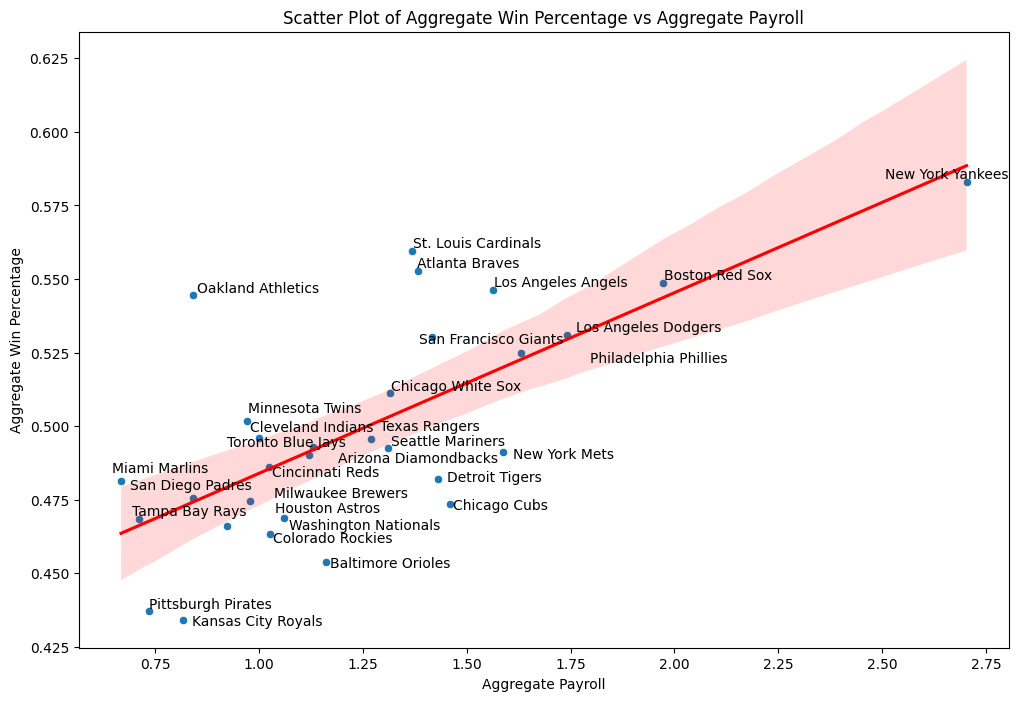

In [22]:
from adjustText import adjust_text

import matplotlib.pyplot as plt

# Create the scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='payroll_aggregate', y='pct_wins_aggregate', data=mlb_aggregate)

# Add labels to each point
texts = []
for i, row in mlb_aggregate.iterrows():
    texts.append(plt.text(row['payroll_aggregate'], row['pct_wins_aggregate'], row['team']))

adjust_text(texts)

# Add the least squares line
sns.regplot(x='payroll_aggregate', y='pct_wins_aggregate', data=mlb_aggregate, scatter=False, color='red')

plt.xlabel('Aggregate Payroll')
plt.ylabel('Aggregate Win Percentage')
plt.title('Scatter Plot of Aggregate Win Percentage vs Aggregate Payroll')
plt.show()

In [21]:
# Calculate efficiency
mlb_aggregate_computed['efficiency'] = mlb_aggregate_computed['pct_wins_aggregate_computed'] / mlb_aggregate_computed['payroll_aggregate_computed']

# Sort by efficiency and select the top 3 teams
top_3_efficiency = mlb_aggregate_computed.nlargest(3, 'efficiency')

# Select relevant columns
top_3_efficiency = top_3_efficiency[['team', 'efficiency', 'pct_wins_aggregate_computed', 'payroll_aggregate_computed']]

# Print the table of the top 3 teams with the greatest efficiency
print(top_3_efficiency)

                 team  efficiency  pct_wins_aggregate_computed  \
14      Miami Marlins    0.011380                     0.467316   
19  Oakland Athletics    0.010315                     0.538549   
26     Tampa Bay Rays    0.010098                     0.461034   

    payroll_aggregate_computed  
14                   41.064287  
19                   52.210169  
26                   45.658051  
